## 用geopandas将相应json数据导出为shapefile文件

In [18]:
import geopandas as gpd

# 直接从URL读取GeoJSON数据。这里的URL指向了包含河南省各级行政区划数据的GeoJSON文件。
url = 'https://geo.datav.aliyun.com/areas_v3/bound/410000_full.json'
gdf = gpd.read_file(url)

# 选择保留特定的列。这些列包括行政区划代码、名称、子区域数量、层级、父级区划、子特征索引和几何信息。
columns_to_keep = ['adcode', 'name', 'childrenNum', 'level', 'parent', 'subFeatureIndex', 'geometry']
# ，创建一个副本，这个副本做的任何修改都不会影响原始的gdf
gdf_selected = gdf[columns_to_keep].copy()
# print(gdf_selected)

#超过十个字符的字段名是不被认可的，提前修改防止报错
# 重命名列以确保字段名不超过10个字符，这是Shapefile格式的限制。
# 对于过长的字段名，进行适当缩写以保持信息尽可能清晰。
new_column_names = {
    'adcode': 'adcode',
    'name': 'name',
    'childrenNum': 'childNum',  # 将'childrenNum'简化为'childNum'
    'level': 'level',
    'parent': 'parent',
    'subFeatureIndex': 'subIdx',  # 将'subFeatureIndex'简化为'subIdx'
    'geometry': 'geometry'
}
gdf_selected.rename(columns=new_column_names, inplace=True)

# 指定输出路径，将处理后的GeoDataFrame保存为Shapefile。
# 注意使用原始字符串（前面加r）或双反斜杠来避免路径中的转义字符问题。
output_path = 'C:\GIS union python\data\henan.shp'

#编码方式为'utf-8'，不用它的话非ASCII字符（如中文）无法正确显示
# 保存为Shapefile，指定编码为'utf-8'。
# 这一步确保Shapefile可以正确处理和显示中文字符。
gdf_selected.to_file(output_path,encoding='utf-8')



## 读取shapefile并根据外部数据设置专题分级设色图

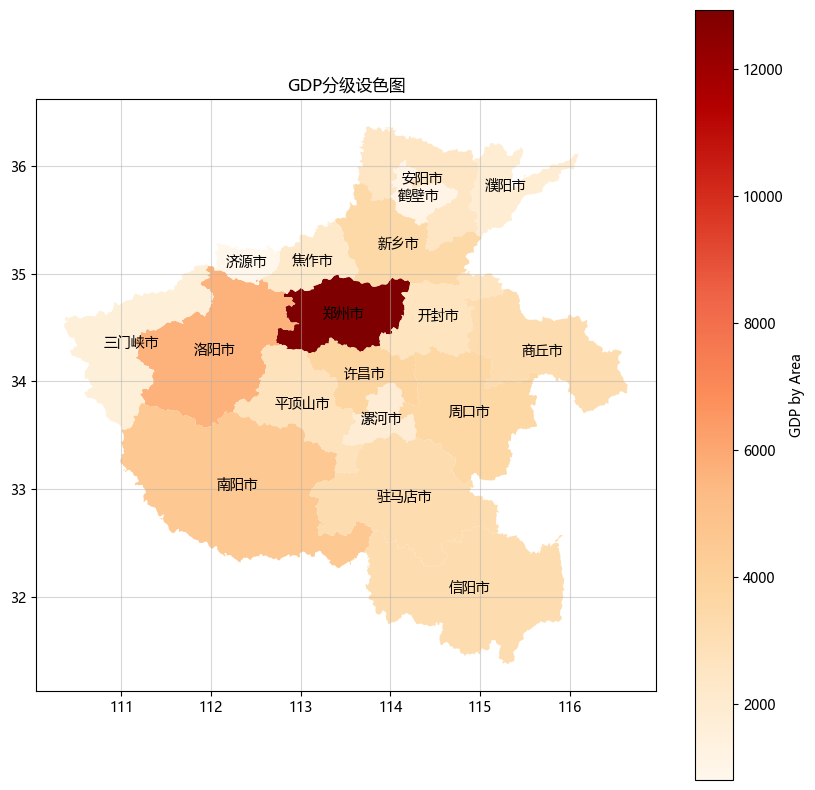

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#临时设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 加载Shapefile
gdf = gpd.read_file(r'C:\GIS union python\data\henan.shp', encoding='utf-8') # 指定UTF-8编码

# 读取Excel文件，这里Excel中有三列：'name'，'gdp'和'Per','Per'是代表人均
excel_data = pd.read_excel(r'C:\GIS union python\data\2023HN各市.xlsx')


gdf = gdf.merge(excel_data, on='name')

# 设置专题分级设色图，各市Gdp专题图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='gdp', ax=ax, legend=True,
         legend_kwds={'label': "GDP by Area"},
         cmap='OrRd') # 选择一个颜色映射

# gdf.plot(column='Per', ax=ax, legend=True,
#          legend_kwds={'label': "Per by Area"},
#          cmap='OrRd') # 选择一个颜色映射

for idx, row in gdf.iterrows():
    plt.annotate(text=row['name'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', verticalalignment='center')

# 可以添加更多的绘图设置，如标题、坐标轴标签等
ax.set_title('GDP分级设色图')
plt.grid(True, alpha=0.5) 
plt.show()
